# Food and feed production by country and food items from 1961 to 2013

This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period. This chunk of the dataset is focused on two utilizations of each food item available:

Food - refers to the total amount of the food item available as human food during the reference period.

Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

We will be using the main data set - fao.csv. 

After analysing this data set we will add three more datasets to look at fao.csv dataset from a different angle.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fao = pd.read_csv('./data/fao.csv', encoding='latin1')

# First look at the data

In [3]:
fao.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
fao.tail()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
21476,ZWE,181,Zimbabwe,2928,Miscellaneous,5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [5]:
fao.shape

(21477, 63)

In [6]:
fao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
Area Abbreviation    21477 non-null object
Area Code            21477 non-null int64
Area                 21477 non-null object
Item Code            21477 non-null int64
Item                 21477 non-null object
Element Code         21477 non-null int64
Element              21477 non-null object
Unit                 21477 non-null object
latitude             21477 non-null float64
longitude            21477 non-null float64
Y1961                17938 non-null float64
Y1962                17938 non-null float64
Y1963                17938 non-null float64
Y1964                17938 non-null float64
Y1965                17938 non-null float64
Y1966                17938 non-null float64
Y1967                17938 non-null float64
Y1968                17938 non-null float64
Y1969                17938 non-null float64
Y1970                17938 non-null float64
Y1971                1

In [7]:
fao.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


In [8]:
# 'Tidying' column names
fao.columns = fao.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
# Total number of unique items produced
fao.item.nunique()

115

In [10]:
fao.item.unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Potatoes and products', 'Sugar cane',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Sweeteners, Other',
       'Honey', 'Pulses, Other and products', 'Nuts and products',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine 

In [11]:
# Unique elements
fao.element.unique()

array(['Food', 'Feed'], dtype=object)

In [12]:
# Array of countries
fao.area.unique()
#fao.area.unique().tolist()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Congo', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'G

In [13]:
# Number of countries
fao.area.nunique()

174

# Items, which are the same in Feed and in Food

In [14]:
# The same items in Food and in Feed - if element == 2, it is in both
items_in_ff = fao.loc[:,['element', 'item']].groupby('item').nunique()
items_in_ff.head()

,element,item
item,,
Alcoholic Beverages,1,1
Animal fats,2,1
Apples and products,2,1
"Aquatic Animals, Others",1,1
Aquatic Plants,2,1


In [15]:
# Counting items which are both in Food and in Feed
items_in_ff[items_in_ff['element'] == 2].count()

element    88
item       88
dtype: int64

In [16]:
# Filtering items which are both in Food and in Feed
items_in_ff[items_in_ff['element'] == 2]

,element,item
item,,
Animal fats,2,1
Apples and products,2,1
Aquatic Plants,2,1
"Aquatic Products, Other",2,1
Bananas,2,1
Barley and products,2,1
Beans,2,1
Bovine Meat,2,1
"Butter, Ghee",2,1


# Total number of items produced by each country

In [17]:
fao.head(2)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422


In [18]:
number_of_items_by_country = (fao.groupby('area')
                              .count()
                              .item_code
                              .sort_values(ascending = False)
                              .reset_index(name='No if items'))
number_of_items_by_country.head()

,area,No if items
0,Spain,150
1,Italy,148
2,Germany,147
3,"China, mainland",146
4,Japan,143


In [19]:
number_of_items_by_country.tail()

,area,No if items
169,Guinea-Bissau,91
170,Turkmenistan,90
171,Timor-Leste,86
172,Afghanistan,83
173,Lesotho,75


<Figure size 1440x720 with 0 Axes>

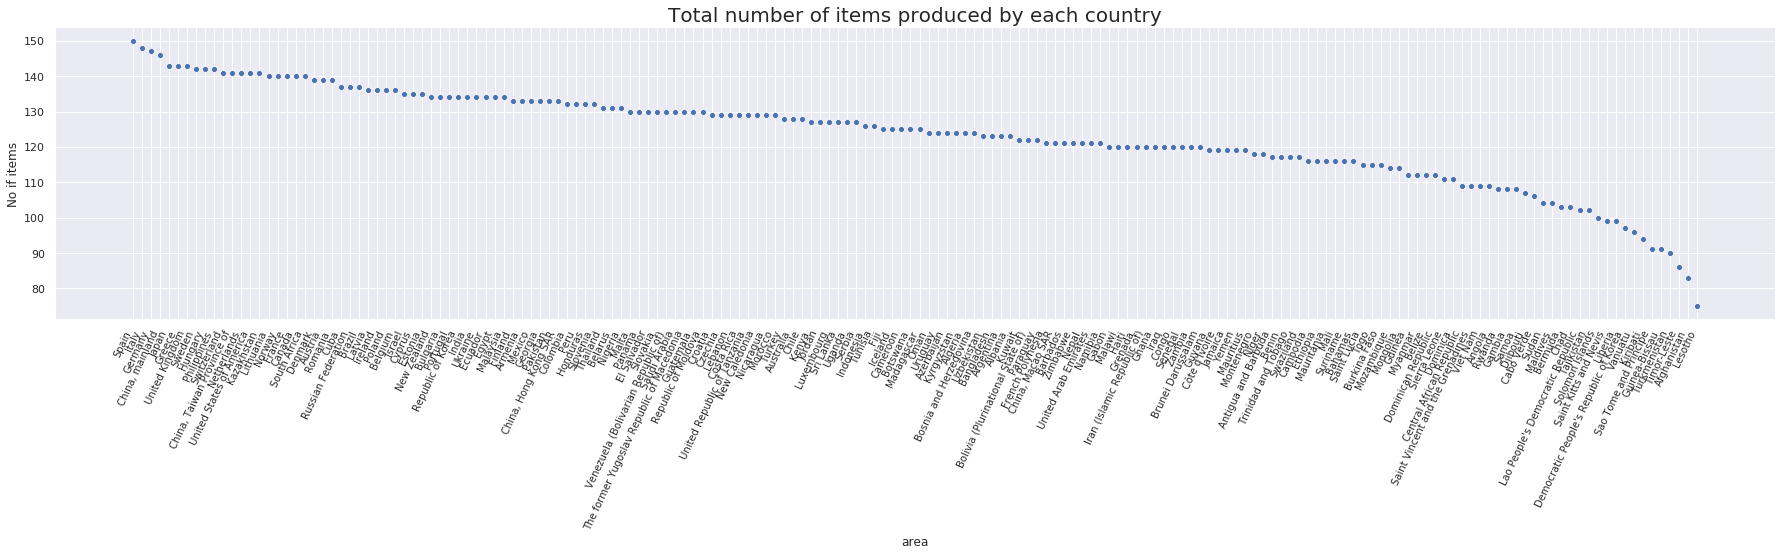

In [20]:
plt.figure(figsize=(20, 10))
sns.set(style='darkgrid')
sns.relplot(x='area', y='No if items', data=number_of_items_by_country, aspect = 5);
plt.xticks(rotation=65, horizontalalignment='right', fontsize=10)
plt.title('Total number of items produced by each country', fontsize=20)
plt.show()

# Total production

In [21]:
year = fao.filter(like='y').columns

In [22]:
year

Index(['y1961', 'y1962', 'y1963', 'y1964', 'y1965', 'y1966', 'y1967', 'y1968',
       'y1969', 'y1970', 'y1971', 'y1972', 'y1973', 'y1974', 'y1975', 'y1976',
       'y1977', 'y1978', 'y1979', 'y1980', 'y1981', 'y1982', 'y1983', 'y1984',
       'y1985', 'y1986', 'y1987', 'y1988', 'y1989', 'y1990', 'y1991', 'y1992',
       'y1993', 'y1994', 'y1995', 'y1996', 'y1997', 'y1998', 'y1999', 'y2000',
       'y2001', 'y2002', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007', 'y2008',
       'y2009', 'y2010', 'y2011', 'y2012', 'y2013'],
      dtype='object')

In [23]:
total_production = fao.loc[:,year].sum()

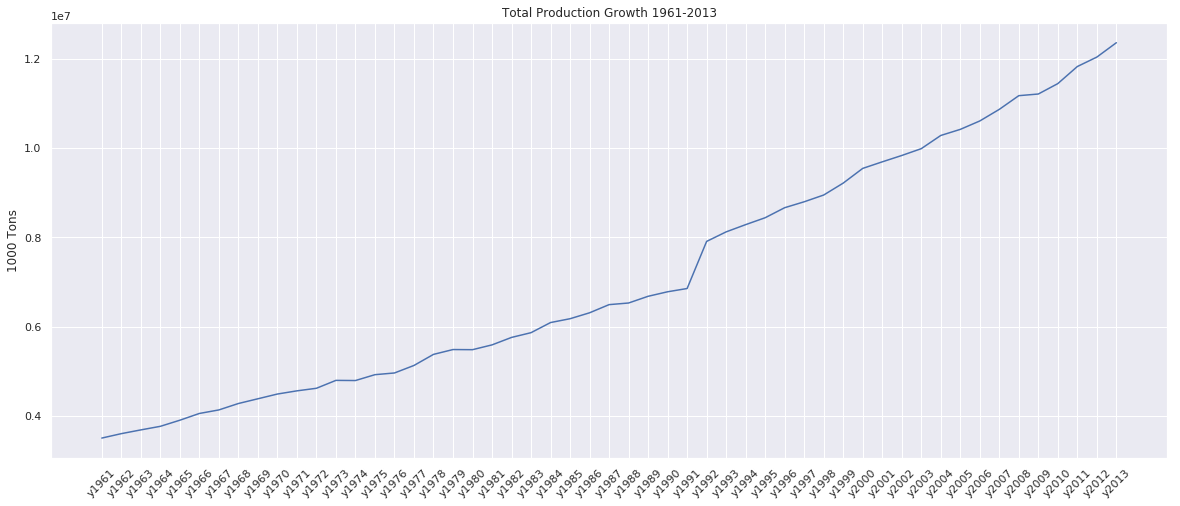

In [24]:
plt.figure(figsize=(20, 8))
plt.tight_layout()
sns.lineplot(data=total_production)
plt.xticks(rotation=45)
plt.ylabel('1000 Tons')
plt.title('Total Production Growth 1961-2013')
plt.show()

# Top 30 items by produced amount

In [25]:
# Top 30 items by amount
total_item_amount = (fao.groupby('item')[year]
                     .sum()
                     .agg('sum', axis=1)
                     .sort_values(ascending=False)[:30]
                     .reset_index(name='1000 Tons'))

total_item_amount.head()

,item,1000 Tons
0,Cereals - Excluding Beer,64884281.0
1,Milk - Excluding Butter,45014120.0
2,Vegetables,24179916.0
3,Starchy Roots,22711529.0
4,Maize and products,19960640.0


Text(0.5, 1.0, 'Top 30 items by produced amount')

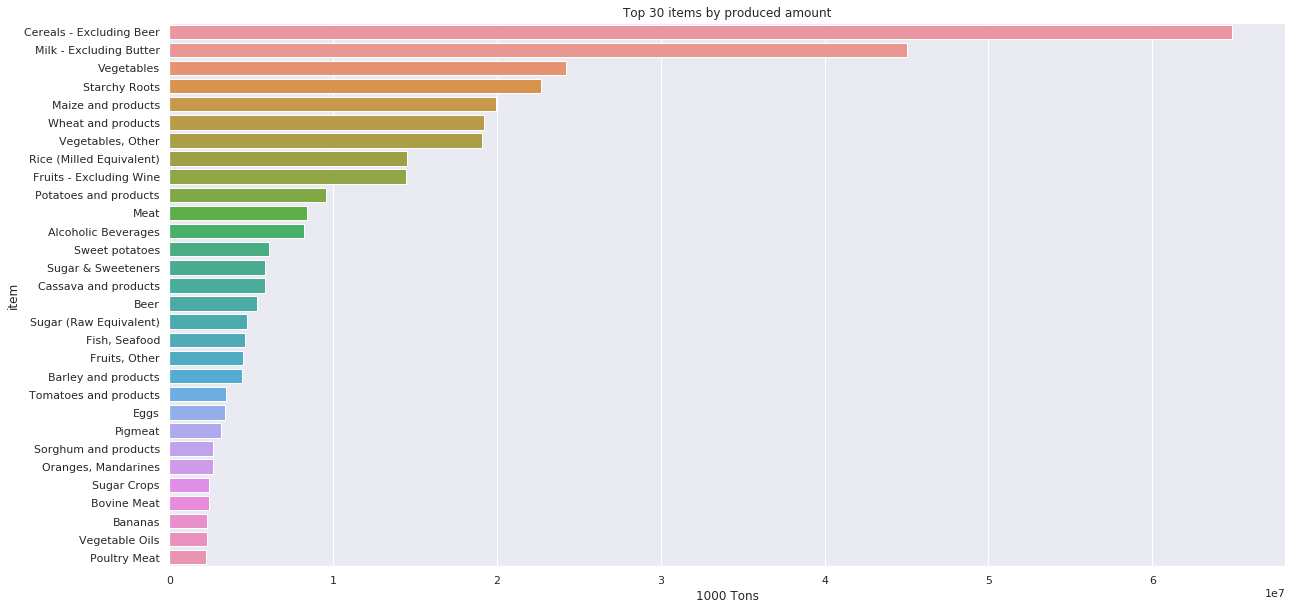

In [26]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(x='1000 Tons', y='item', data=total_item_amount, estimator=sum)
plt.title('Top 30 items by produced amount')

# Top & bottom producers

In [27]:
producers = (fao.groupby('area')[year]
                        .sum()
                        .agg('sum', axis=1)
                        .sort_values(ascending=False)
                        .reset_index(name='1000 Tons'))

In [28]:
producers.head()

,area,1000 Tons
0,"China, mainland",76248859.0
1,United States of America,41719176.0
2,India,36549150.0
3,Brazil,13818239.0
4,Germany,12300442.0


In [29]:
producers.tail()

,area,1000 Tons
169,Grenada,6379.0
170,Bermuda,4933.0
171,Antigua and Barbuda,4446.0
172,Kiribati,4406.0
173,Saint Kitts and Nevis,2102.0


In [30]:
producers.median()

1000 Tons    384845.0
dtype: float64

In [31]:
# Producers above median
producers[producers['1000 Tons'] > producers['1000 Tons'].median(axis=0)]

,area,1000 Tons
0,"China, mainland",76248859.0
1,United States of America,41719176.0
2,India,36549150.0
3,Brazil,13818239.0
4,Germany,12300442.0
5,Japan,9840441.0
6,France,8789026.0
7,Italy,7734322.0
8,Russian Federation,7726768.0
9,Nigeria,7354579.0


Text(0.5, 1.0, 'Top ten producers')

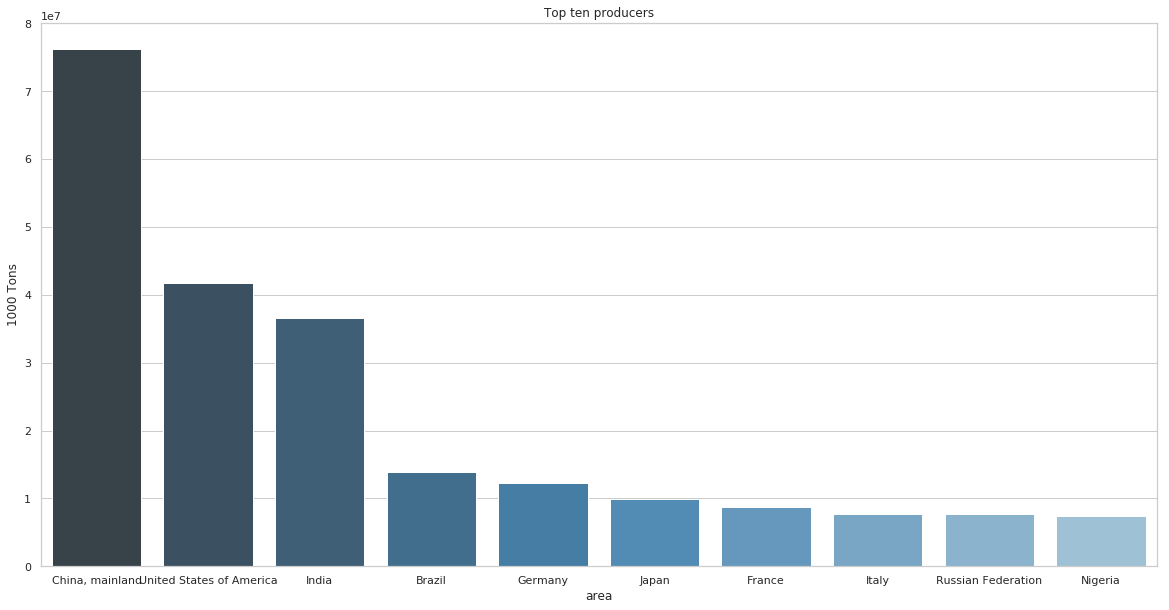

In [32]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.set(style='whitegrid')
ax = sns.barplot(x='area', y='1000 Tons', data=producers.iloc[:10], palette="Blues_d", estimator=sum)
plt.title('Top ten producers')

# Top five Countries Annual Production

In [33]:
# Total production of each country by year
fao.groupby(['area']).sum().head()

,area_code,item_code,element_code,latitude,longitude,y1961,y1962,y1963,y1964,y1965,...,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013
area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,166,224695,430576,2817.02,5619.93,9481.0,9414.0,9194.0,10170.0,10473.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
Albania,369,331693,641941,5061.45,2480.91,1706.0,1749.0,1767.0,1889.0,1884.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271
Algeria,496,333506,645946,3475.72,205.84,7488.0,7235.0,6861.0,7255.0,7509.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161
Angola,763,295092,566163,-1220.80,1947.83,4834.0,4775.0,5240.0,5286.0,5527.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639
Antigua and Barbuda,936,315344,606541,1996.02,-7230.60,92.0,94.0,105.0,95.0,84.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119


In [34]:
# Getting top 5 producers
top_five_indexes = fao.groupby('area')[year].sum().agg('sum', axis=1).sort_values(ascending=False).head(5).index
top_five_indexes

Index(['China, mainland', 'United States of America', 'India', 'Brazil',
       'Germany'],
      dtype='object', name='area')

In [35]:
# Top 5 producers DataFrame 
total_by_countries = fao.groupby('area')[year].sum().T
top_five_countries = total_by_countries.loc[:,top_five_indexes]
top_five_countries.head()

area,"China, mainland",United States of America,India,Brazil,Germany
y1961,477279.0,559347.0,309565.0,126501.0,212839.0
y1962,499497.0,556319.0,318802.0,142536.0,227999.0
y1963,501795.0,552630.0,315155.0,152178.0,231823.0
y1964,506368.0,555677.0,324564.0,154698.0,235210.0
y1965,565759.0,589288.0,327376.0,152060.0,237710.0


In [36]:
# "Melting" DataFrame (unpivoting)
top_five_countries['year'] = top_five_countries.index
top_five_countries_melted = (top_five_countries.
                             melt(id_vars=['year'], 
                                  value_vars=['China, mainland', 'United States of America', 'India', 'Brazil', 'Germany']))
top_five_countries_melted.head()

,year,area,value
0,y1961,"China, mainland",477279.0
1,y1962,"China, mainland",499497.0
2,y1963,"China, mainland",501795.0
3,y1964,"China, mainland",506368.0
4,y1965,"China, mainland",565759.0


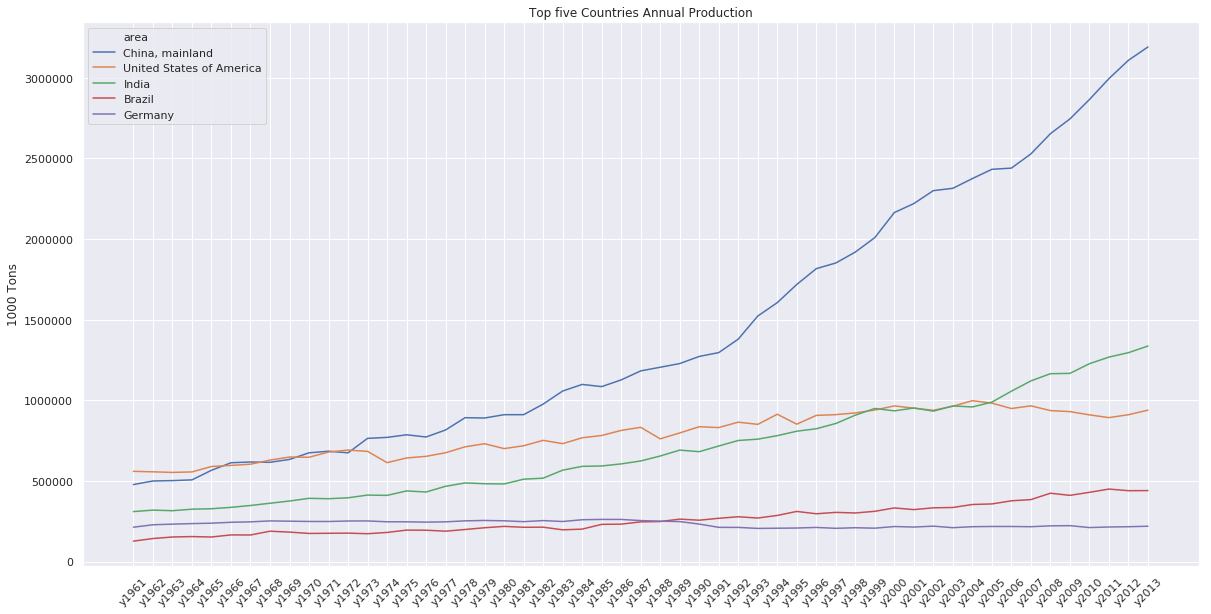

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.lineplot(x='year', y='value', hue='area', data=top_five_countries_melted)
plt.xlabel('')
plt.ylabel('1000 Tons')
plt.xticks(rotation=45)
plt.title('Top five Countries Annual Production')
plt.show()

# What does top 3 countries produce? 
China, mainland, United States of America, India

In [38]:
fao['total']  = fao[year].sum(axis=1)

In [39]:
fao.head(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,total
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,132926.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,15282.0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,5190.0


In [40]:
fao_area_item = fao[['area', 'item', 'total']]

In [41]:
top_three_countries = fao_area_item[fao_area_item['area'].isin(['China, mainland','United States of America', 'India'])]
grouped_top_three_countries = top_three_countries.groupby(['area','item']).sum()
grouped_top_three_countries

total
area                     item                                  
China, mainland          Alcoholic Beverages          1000800.0
                         Animal fats                    72713.0
                         Apples and products           411013.0
                         Aquatic Animals, Others        12256.0
                         Aquatic Plants                208561.0
                         Aquatic Products, Other       220815.0
                         Bananas                       132987.0
                         Barley and products           100635.0
                         Beans                          59535.0
                         Beer                          682130.0
                         Beverages, Alcoholic          240729.0
                         Beverages, Fermented           47549.0
                         Bovine Meat                   117011.0
                         Butter, Ghee                    3279.0
                         Cassava and products          309744.0
                         Cephalopods                    16321.0
                         Cereals - Excluding Beer    12763579.0
                         Cereals, Other                 85212.0
                         Citrus, Other                  41930.0
                         Cloves                            33.0
                         Cocoa Beans and products        1274.0
                         Coconut Oil                     3238.0
                         Coconuts - Incl Copra           8100.0
                         Coffee and products              477.0
                         Cottonseed                     78463.0
                         Cottonseed Oil                 26568.0
                         Cream                             83.0
                         Crustaceans                    87745.0
                         Dates                           3983.0
                         Demersal Fish                  98637.0
...                                                         ...
United States of America Pulses                         48825.0
                         Pulses, Other and products      3322.0
                         Rape and Mustard Oil            8813.0
                         Rape and Mustardseed            2870.0
                         Rice (Milled Equivalent)       72937.0
                         Roots, Other                    2784.0
                         Rye and products               14425.0
                         Sesame seed                     1559.0
                         Sorghum and products          542739.0
                         Soyabean Oil                  233923.0
                         Soyabeans                      23263.0
                         Spices                          7660.0
                         Spices, Other                   2767.0
                         Starchy Roots                 802880.0
                         Stimulants                     99150.0
                         Sugar & Sweeteners            822894.0
                         Sugar (Raw Equivalent)        477297.0
                         Sunflower seed                 16839.0
                         Sunflowerseed Oil               2096.0
                         Sweet potatoes                 31588.0
                         Sweeteners, Other             338239.0
                         Tea (including mate)            5524.0
                         Tomatoes and products         477800.0
                         Treenuts                       35858.0
                         Vegetable Oils                303102.0
                         Vegetables                   1509962.0
                         Vegetables, Other             919318.0
                         Wheat and products           1307303.0
                         Wine                           92371.0
                         Yams                             753.0

[323 rows x 1 columns]

# Items in Food/Feed - unique number, total number, total amount

In [42]:
# Unique items in Food/Feed
ff_unique_items = fao.groupby('element')['item'].nunique()
ff_unique_items.reset_index(name='Unique items')

,element,Unique items
0,Feed,88
1,Food,115


In [43]:
# Number of items in Food/Feed - combined from all countries
ff_items_count = fao.element.value_counts().sort_index()
ff_items_count.reset_index(name='No of items produced')

,index,No of items produced
0,Feed,3949
1,Food,17528


In [44]:
# Amount of items produced by all countries
ff_produced_amount = (fao.groupby('element')
                      .sum().loc[:, year]
                      .agg('sum', axis=1)
                      .sort_index())
                      
ff_produced_amount.reset_index(name='Produced amount')

,element,Produced amount
0,Feed,87348711.0
1,Food,291375363.0


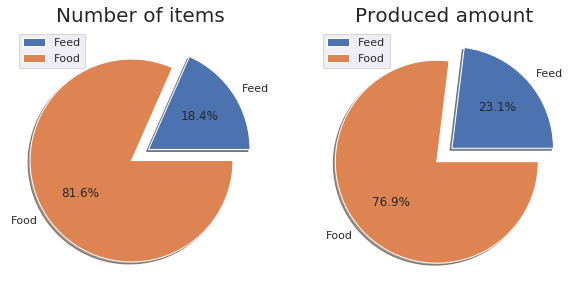

In [45]:
plt.figure(figsize=(10, 10))
labels = ff_produced_amount.index
plt.subplot(121)
plt.pie(ff_items_count, labels=labels,  autopct='%1.1f%%', explode=[0.1, 0.1], shadow=True)
plt.title('Number of items', fontsize=20)
plt.legend()

plt.subplot(122)
plt.pie(ff_produced_amount, labels=labels,  autopct='%1.1f%%', explode=[0.1, 0.1], shadow=True)
plt.title('Produced amount', fontsize=20)
plt.legend()
plt.show()

# Who are top producers in top 3 categories?

In [46]:
top_three_cat = (fao.groupby('item')[year]
                 .sum().agg('sum', axis=1)
                 .sort_values(ascending=False)[:3]
                 .reset_index(name='1000 Tons'))

In [47]:
top_three_cat

,item,1000 Tons
0,Cereals - Excluding Beer,64884281.0
1,Milk - Excluding Butter,45014120.0
2,Vegetables,24179916.0


In [48]:
# Top five producers in item 'Cereals - Excluding Beer'
(fao[fao.item == 'Cereals - Excluding Beer']
 .groupby('area')[year]
 .sum()
 .agg('sum', axis=1)
 .sort_values(ascending=False)[:5]
 .reset_index(name='1000 Tons'))

,area,1000 Tons
0,"China, mainland",12763579.0
1,United States of America,8732556.0
2,India,6881734.0
3,Brazil,1882294.0
4,Germany,1624130.0


In [49]:
# Top five producers in item 'Milk - Excluding Butter'
(fao[fao.item == 'Milk - Excluding Butter']
 .groupby('area')[year]
 .sum()
 .agg('sum', axis=1)
 .sort_values(ascending=False)[:5]
 .reset_index(name='1000 Tons'))

,area,1000 Tons
0,United States of America,6789358.0
1,India,5753438.0
2,Germany,2602704.0
3,France,2097044.0
4,Brazil,1635108.0


In [50]:
# Top five producers in item 'Vegetables'
(fao[fao.item == 'Vegetables']
 .groupby('area')[year]
 .sum()
 .agg('sum', axis=1)
 .sort_values(ascending=False)[:5]
 .reset_index(name='1000 Tons'))

,area,1000 Tons
0,"China, mainland",9486336.0
1,India,2499400.0
2,United States of America,1509962.0
3,Japan,716976.0
4,Turkey,701036.0


# Food items heat map

In [51]:
for_food_heat_map = fao[fao['element'] == 'Food']
for_food = for_food_heat_map.groupby('item')[year].sum()

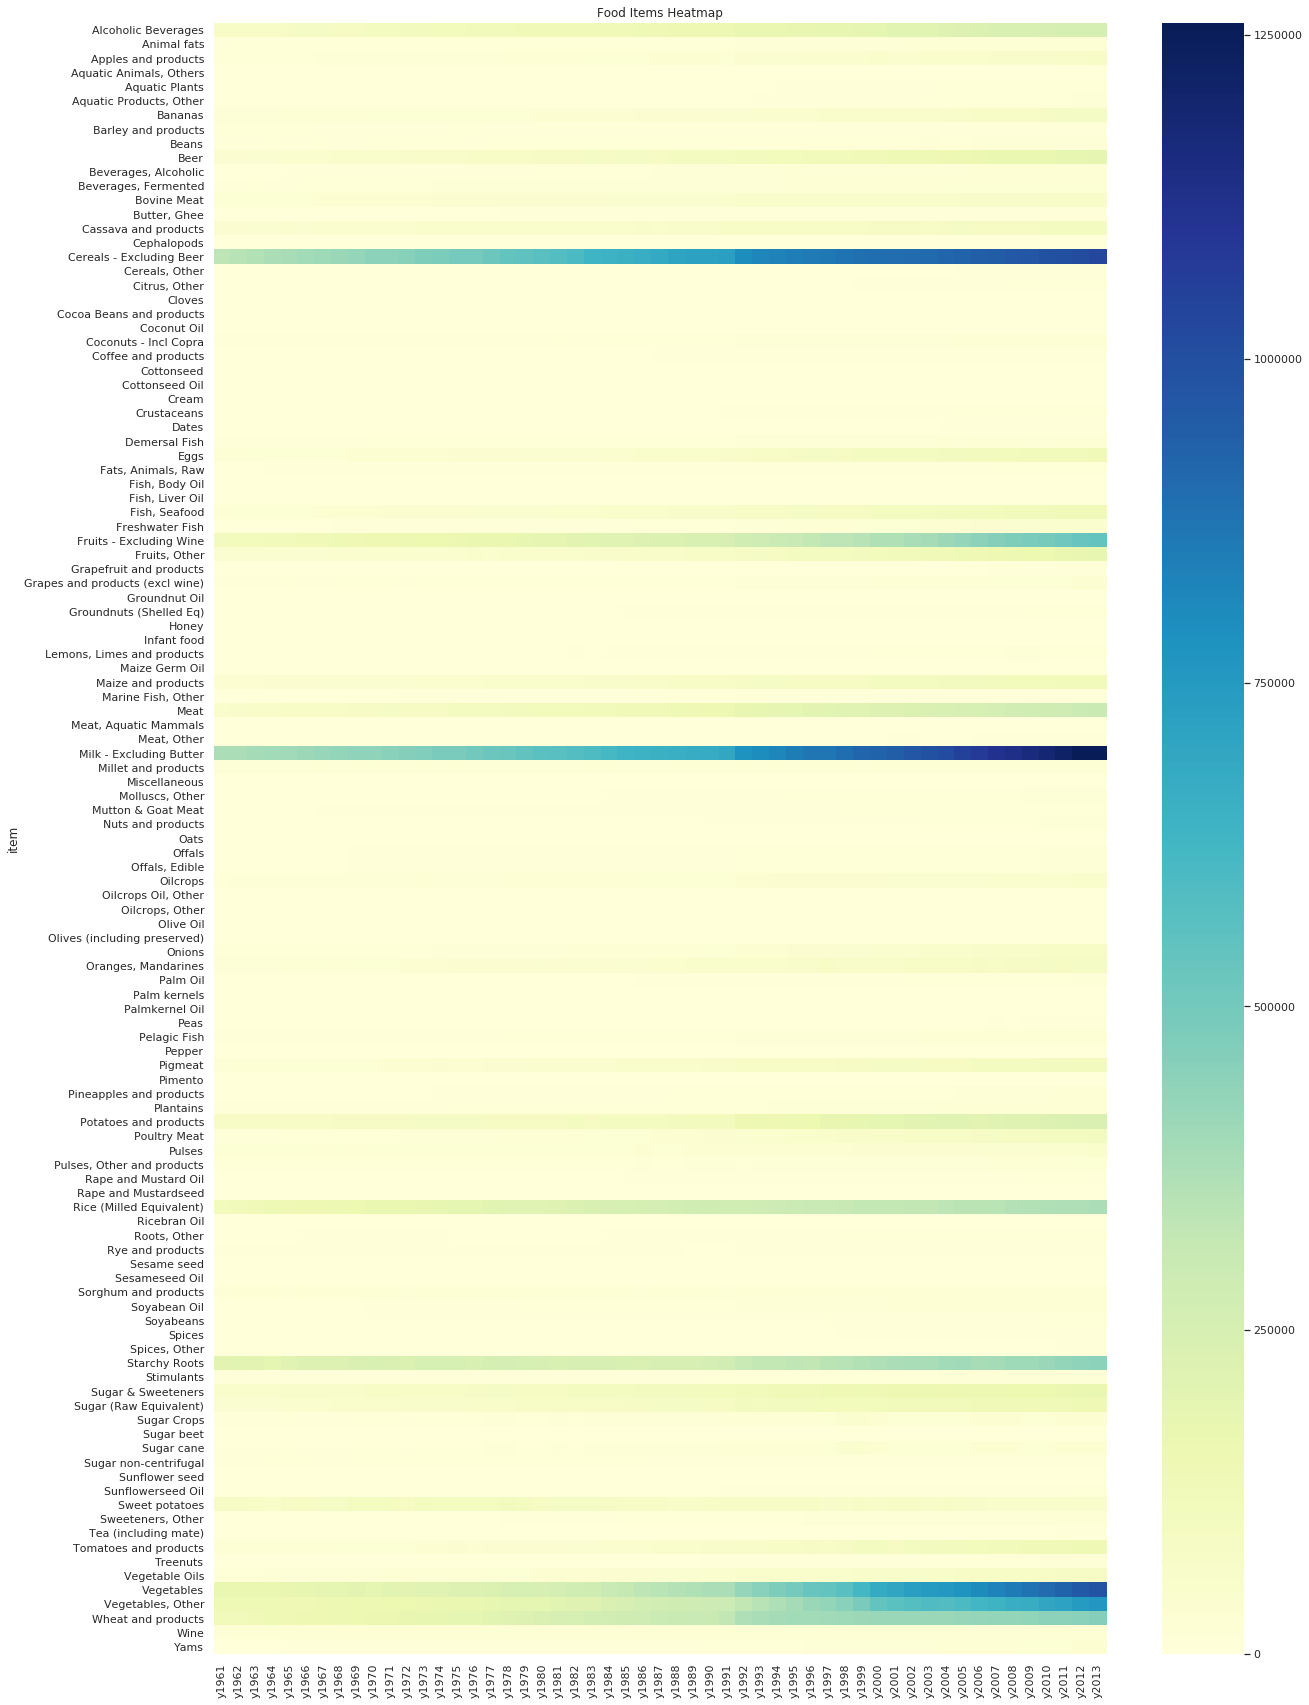

In [52]:
plt.figure(figsize=(20, 30))
sns.heatmap(for_food, cmap="YlGnBu", xticklabels=True, yticklabels=True)
plt.title('Food Items Heatmap')
plt.show()

# Feed items heat map

In [53]:
for_feed_heat_map = fao[fao['element'] == 'Feed']
for_feed = for_feed_heat_map.groupby('item')[year].sum()

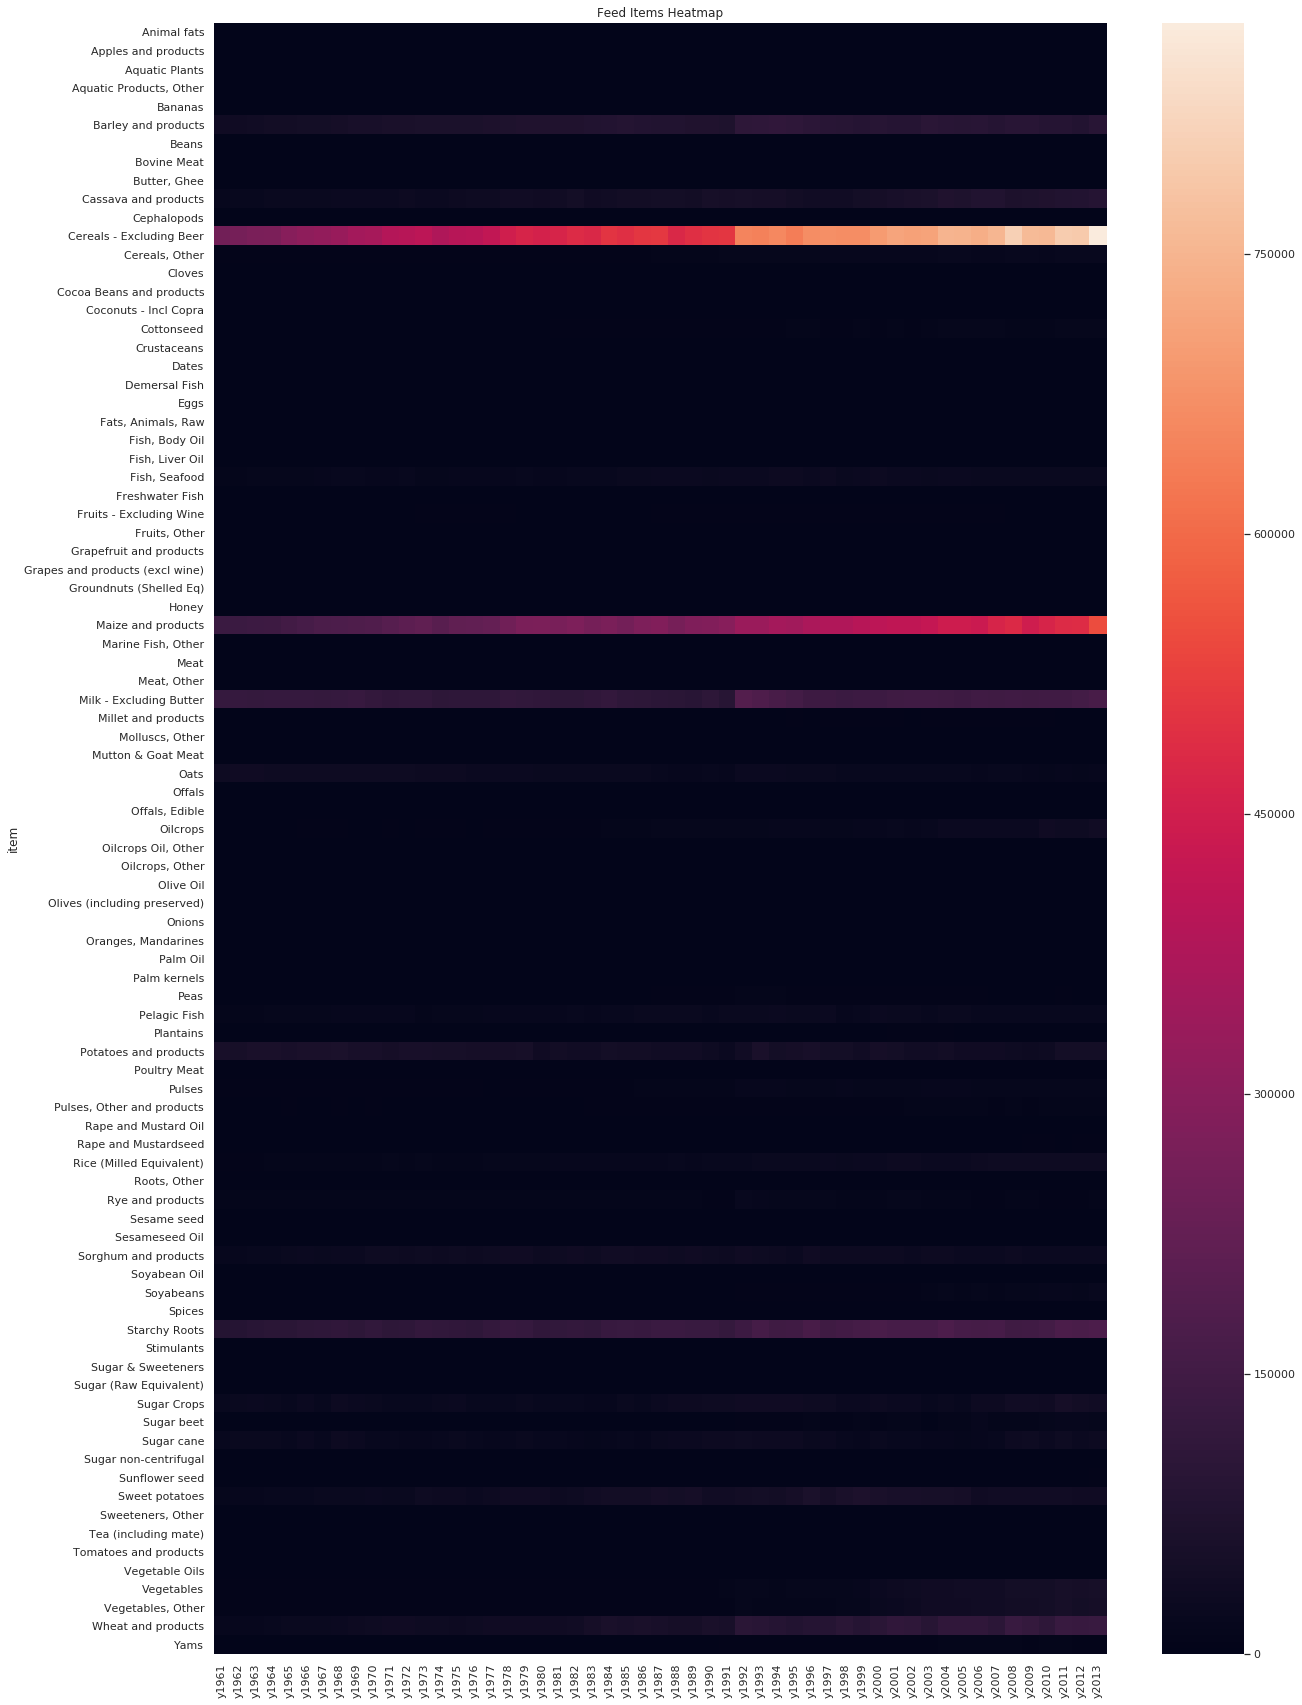

In [54]:
plt.figure(figsize=(20, 30))
sns.heatmap(for_feed, xticklabels=True, yticklabels=True)
plt.title('Feed Items Heatmap')
plt.show()

# Top items by total production in Food and in Feed vs. Country

In [55]:
short_fao = fao.loc[:, ['area', 'item', 'element', 'total']].sort_values(by='total', ascending = False).head(50)
short_fao.head()

,area,item,element,total
4249,"China, mainland",Vegetables,Food,9046594.0
4237,"China, mainland",Cereals - Excluding Beer,Food,8678866.0
4186,"China, mainland","Vegetables, Other",Food,7962498.0
20506,United States of America,Cereals - Excluding Beer,Feed,7408504.0
9139,India,Cereals - Excluding Beer,Food,6675867.0


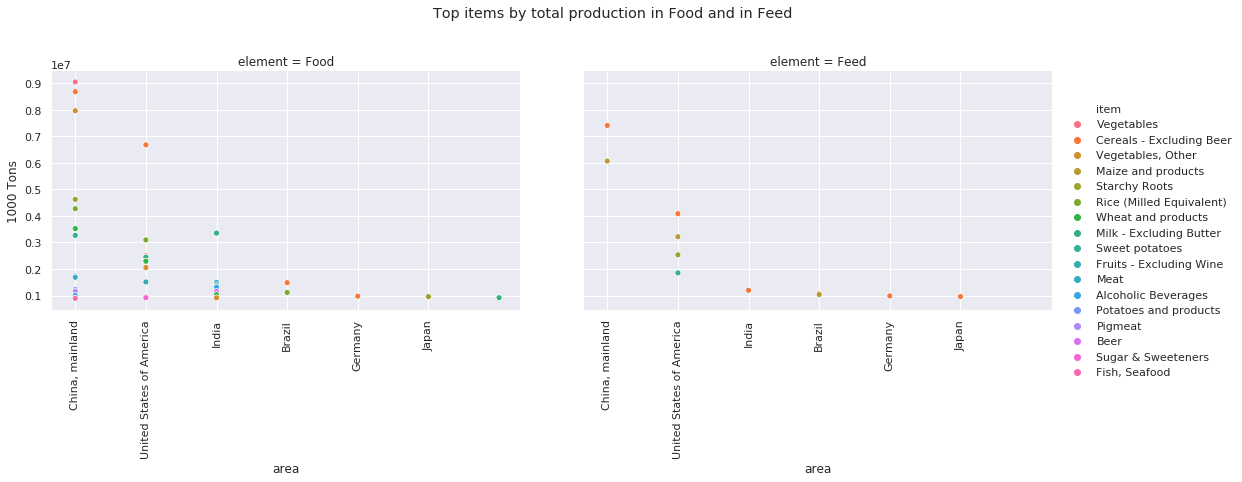

In [56]:
sns.set(style="darkgrid")
g = sns.relplot(x="area", y="total", hue="item", col="element", data=short_fao, aspect = 1.5)
g.fig.suptitle('Top items by total production in Food and in Feed')
g.fig.subplots_adjust(top=.8)
g.set_ylabels('1000 Tons')
labels = ax.get_xticklabels()
g.set_xticklabels(labels, rotation=90)

# Production vs population

In [57]:
ff_prod_total = fao.groupby('element')[year].sum().T
ff_prod_total.head()

element,Feed,Food
y1961,884314.0,2618297.0
y1962,913198.0,2688434.0
y1963,954852.0,2730772.0
y1964,972294.0,2793351.0
y1965,1006792.0,2895741.0


In [58]:
population = pd.read_csv('./data/word_population.csv')

In [59]:
ff_prod_total['year'] = ff_prod_total.index
ff_prod_total.head()

element,Feed,Food,year
y1961,884314.0,2618297.0,y1961
y1962,913198.0,2688434.0,y1962
y1963,954852.0,2730772.0,y1963
y1964,972294.0,2793351.0,y1964
y1965,1006792.0,2895741.0,y1965


In [60]:
population.head()

,year,population
0,y1961,3073368588
1,y1962,3126509808
2,y1963,3191786431
3,y1964,3257459749
4,y1965,3324545317


In [61]:
population.shape

(53, 2)

In [62]:
ff_prod_total.shape

(53, 3)

In [63]:
prod_pop = pd.merge(ff_prod_total, population, on='year', how='left')

In [64]:
prod_pop.head()

,Feed,Food,year,population
0,884314.0,2618297.0,y1961,3073368588
1,913198.0,2688434.0,y1962,3126509808
2,954852.0,2730772.0,y1963,3191786431
3,972294.0,2793351.0,y1964,3257459749
4,1006792.0,2895741.0,y1965,3324545317


In [65]:
# Food Production for one person (tons) 
prod_pop['food_for_pop'] = (prod_pop['Food'] / prod_pop['population']) * 1000

In [66]:
prod_pop.head()

,Feed,Food,year,population,food_for_pop
0,884314.0,2618297.0,y1961,3073368588,0.851931
1,913198.0,2688434.0,y1962,3126509808,0.859883
2,954852.0,2730772.0,y1963,3191786431,0.855562
3,972294.0,2793351.0,y1964,3257459749,0.857524
4,1006792.0,2895741.0,y1965,3324545317,0.871019


In [67]:
# Feed Production for one person (tons) 
prod_pop['feed_for_pop'] =(prod_pop['Feed'] / prod_pop['population']) * 1000

In [68]:
prod_pop.head()

,Feed,Food,year,population,food_for_pop,feed_for_pop
0,884314.0,2618297.0,y1961,3073368588,0.851931,0.287734
1,913198.0,2688434.0,y1962,3126509808,0.859883,0.292082
2,954852.0,2730772.0,y1963,3191786431,0.855562,0.299159
3,972294.0,2793351.0,y1964,3257459749,0.857524,0.298482
4,1006792.0,2895741.0,y1965,3324545317,0.871019,0.302836


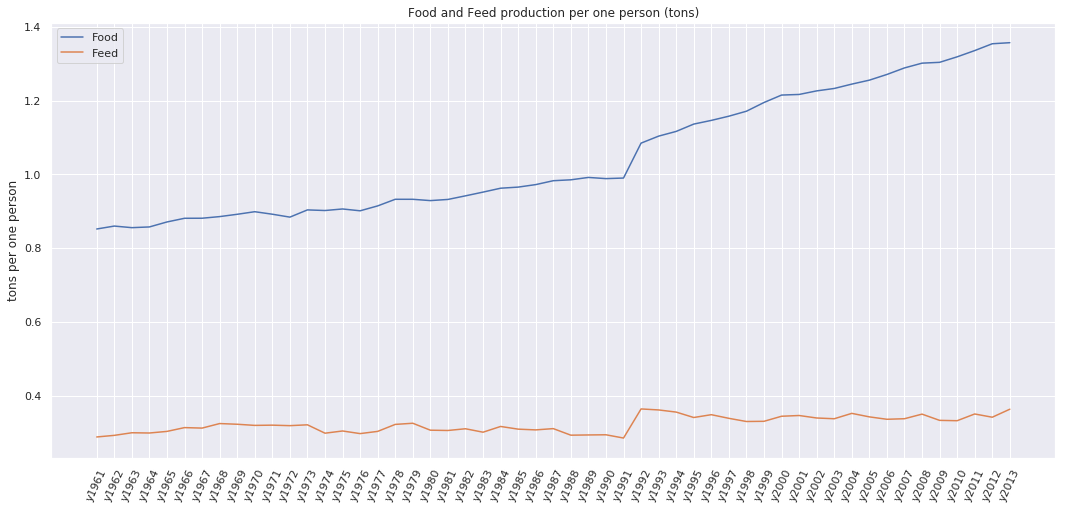

In [69]:
plt.figure(figsize=(18, 8))
sns.lineplot(x='year', y='food_for_pop', data=prod_pop, label = 'Food')
sns.lineplot(x='year', y='feed_for_pop', data=prod_pop, label = 'Feed')
plt.xticks(rotation=65)
plt.legend()
plt.ylabel('tons per one person')
plt.xlabel('')
plt.title('Food and Feed production per one person (tons)')
plt.show()

# Food items per person

In [70]:
for_food.head(3)

,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,...,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013
item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,69924.0,72447.0,75105.0,77976.0,80127.0,83660.0,86095.0,89075.0,92729.0,97789.0,...,217392.0,222722.0,233310.0,244420.0,244373.0,243452.0,247414.0,256269.0,258895,260701
Animal fats,9669.0,10000.0,10091.0,10292.0,10464.0,10385.0,10756.0,11020.0,10926.0,11021.0,...,20493.0,20630.0,21260.0,21680.0,21764.0,21859.0,22212.0,22489.0,23033,23231
Apples and products,10718.0,13050.0,13921.0,14360.0,13541.0,14041.0,16203.0,16436.0,17792.0,16954.0,...,53489.0,55037.0,57502.0,59278.0,60465.0,60866.0,61898.0,64256.0,68153,70671


In [71]:
food_items_per_person = for_food.T
food_items_per_person['year'] = food_items_per_person.index

In [72]:
food_items_per_person_pop =  pd.merge(food_items_per_person, population, on='year', how='left')
food_items_per_person_pop.head()

,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams,year,population
0,69924.0,9669.0,10718.0,39.0,373.0,411.0,16214.0,11432.0,8973.0,37589.0,...,20461.0,2512.0,12851.0,174230.0,141869.0,123915.0,19342.0,4277.0,y1961,3073368588
1,72447.0,10000.0,13050.0,39.0,384.0,424.0,16820.0,12098.0,9335.0,38699.0,...,21872.0,2483.0,13745.0,174611.0,140477.0,127675.0,19909.0,4249.0,y1962,3126509808
2,75105.0,10091.0,13921.0,41.0,437.0,478.0,17491.0,10993.0,9480.0,40274.0,...,20776.0,2566.0,14393.0,175060.0,141945.0,130807.0,20588.0,4620.0,y1963,3191786431
3,77976.0,10292.0,14360.0,45.0,517.0,563.0,18318.0,10748.0,9879.0,43244.0,...,21816.0,2621.0,15040.0,172677.0,138491.0,137865.0,20392.0,4909.0,y1964,3257459749
4,80127.0,10464.0,13541.0,49.0,550.0,599.0,20201.0,11099.0,9634.0,44689.0,...,22554.0,2592.0,15869.0,177969.0,142818.0,145350.0,21010.0,5226.0,y1965,3324545317


In [73]:
food_items_per_person_pop.index = food_items_per_person_pop.year
food_items_per_person_pop.iloc[:, :-2].head()

,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
year,,,,,,,,,,,,,,,,,,,,,
y1961,69924.0,9669.0,10718.0,39.0,373.0,411.0,16214.0,11432.0,8973.0,37589.0,...,2068.0,1155.0,20461.0,2512.0,12851.0,174230.0,141869.0,123915.0,19342.0,4277.0
y1962,72447.0,10000.0,13050.0,39.0,384.0,424.0,16820.0,12098.0,9335.0,38699.0,...,2182.0,1158.0,21872.0,2483.0,13745.0,174611.0,140477.0,127675.0,19909.0,4249.0
y1963,75105.0,10091.0,13921.0,41.0,437.0,478.0,17491.0,10993.0,9480.0,40274.0,...,2369.0,1160.0,20776.0,2566.0,14393.0,175060.0,141945.0,130807.0,20588.0,4620.0
y1964,77976.0,10292.0,14360.0,45.0,517.0,563.0,18318.0,10748.0,9879.0,43244.0,...,2527.0,1216.0,21816.0,2621.0,15040.0,172677.0,138491.0,137865.0,20392.0,4909.0
y1965,80127.0,10464.0,13541.0,49.0,550.0,599.0,20201.0,11099.0,9634.0,44689.0,...,2800.0,1233.0,22554.0,2592.0,15869.0,177969.0,142818.0,145350.0,21010.0,5226.0


In [74]:
food_items_per_person_pop_div = (((food_items_per_person_pop.iloc[:, :-2]
                                   .div(food_items_per_person_pop.population, axis=0)) * 1000000).T)

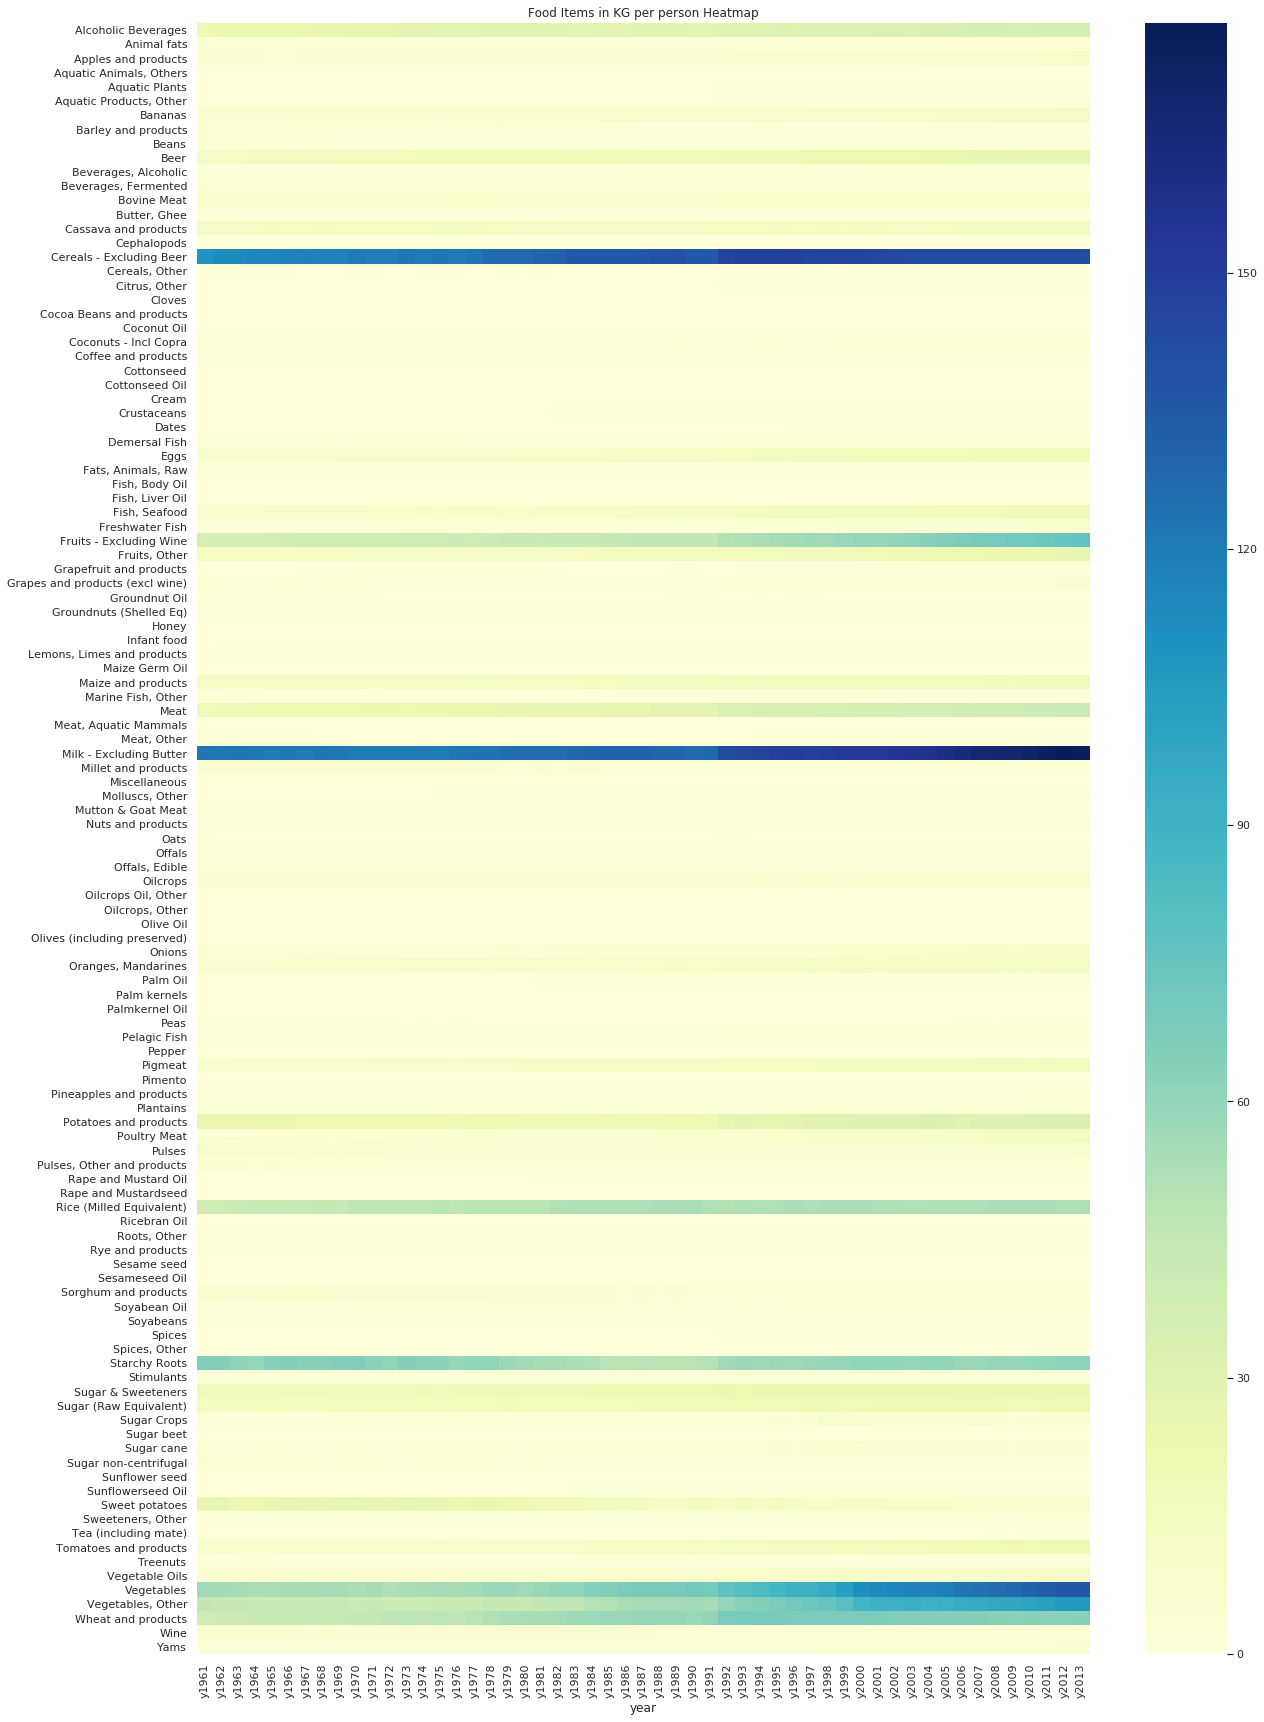

In [75]:
plt.figure(figsize=(20, 30))
sns.heatmap(food_items_per_person_pop_div, cmap="YlGnBu", xticklabels=True, yticklabels=True)
plt.title('Food Items in KG per person Heatmap')
plt.show()

# Adding regions

In [76]:
regions = pd.read_csv('./data/regions.csv')

In [77]:
regions.head()

,area,region
0,Afghanistan,ASIA (EX. NEAR EAST)
1,Albania,EASTERN EUROPE
2,Algeria,NORTHERN AFRICA
3,Angola,SUB-SAHARAN AFRICA
4,Antigua and Barbuda,LATIN AMER. & CARIB


In [78]:
fao_with_regions = pd.merge(fao, regions, on='area', how='left')

In [79]:
fao_with_regions.head(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,total,region
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,132926.0,ASIA (EX. NEAR EAST)
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,546.0,455.0,490.0,415.0,442.0,476.0,425,422,15282.0,ASIA (EX. NEAR EAST)
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,262.0,263.0,230.0,379.0,315.0,203.0,367,360,5190.0,ASIA (EX. NEAR EAST)


<Figure size 1440x1080 with 0 Axes>

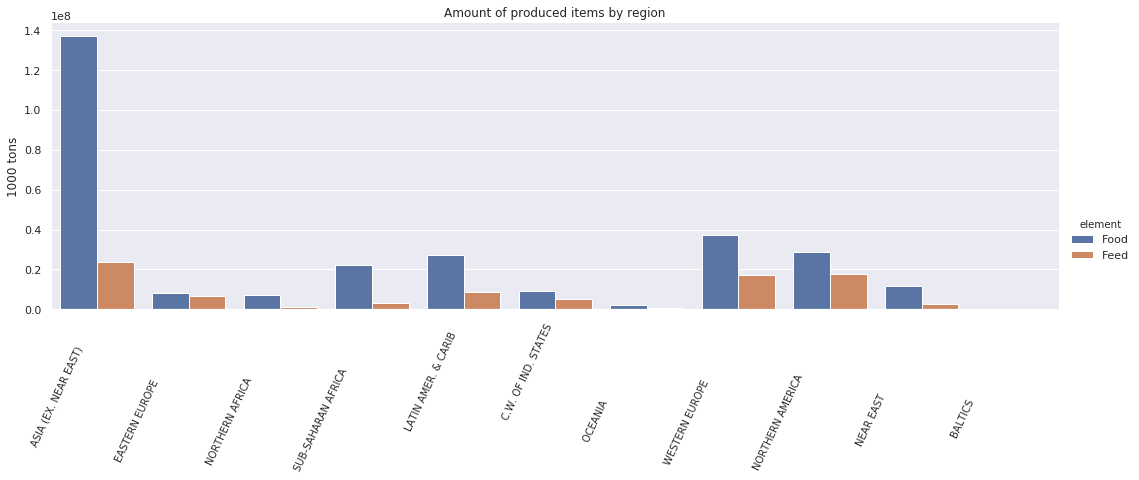

In [80]:
plt.figure(figsize=(20, 15))
sns.catplot(x="region", y="total", hue="element", kind="bar", data=fao_with_regions, aspect=3, estimator=sum, ci=None)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=10)
plt.xlabel('')
plt.ylabel('1000 tons')
plt.title('Amount of produced items by region')
plt.show()

# Assign Items to bigger categories

In [81]:
# For a better picture, I created a dataset categories.csv, where all items are assigned to bigger categories
categories = pd.read_csv('./data/categories.csv')
categories.head()

,item_code,item,item_category
0,2511,Wheat and products,Crop
1,2513,Barley and products,Crop
2,2514,Maize and products,Crop
3,2515,Rye and products,Crop
4,2516,Oats,Crop


In [82]:
categories.item_category.unique()

array(['Crop', 'Sugar', 'Nuts', 'Vegetable oil', 'Fruits & vegetables',
       'Coffee, cocoa', 'Tea', 'Spices', 'Alcoholic Beverages',
       'Infant food', 'Meat & Meat products', 'Dairy', 'Eggs', 'Honey',
       'Fish & Fish products', 'Miscellaneous'], dtype=object)

In [83]:
categories.item_category.nunique()

16

In [84]:
new_df_with_cat = (pd.merge(fao.loc[:, ['area', 'item_code','item', 'element', 'total']]
                            .sort_values(by='total', ascending = False), categories, on='item_code', how='left'))
new_df_with_cat.head()

,area,item_code,item_x,element,total,item_y,item_category
0,"China, mainland",2918,Vegetables,Food,9046594.0,Vegetables,Fruits & vegetables
1,"China, mainland",2905,Cereals - Excluding Beer,Food,8678866.0,Cereals - Excluding Beer,Crop
2,"China, mainland",2605,"Vegetables, Other",Food,7962498.0,"Vegetables, Other",Fruits & vegetables
3,United States of America,2905,Cereals - Excluding Beer,Feed,7408504.0,Cereals - Excluding Beer,Crop
4,India,2905,Cereals - Excluding Beer,Food,6675867.0,Cereals - Excluding Beer,Crop


In [85]:
# Cheking if there item_x values matches item_y
new_df_with_cat[new_df_with_cat.item_x != new_df_with_cat.item_y]

,area,item_code,item_x,element,total,item_y,item_category


In [86]:
new_df_with_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21477 entries, 0 to 21476
Data columns (total 7 columns):
area             21477 non-null object
item_code        21477 non-null int64
item_x           21477 non-null object
element          21477 non-null object
total            21477 non-null float64
item_y           21477 non-null object
item_category    21477 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


In [87]:
new_df_with_cat.rename(columns={'item_x': 'item'}, inplace=True)
new_df_with_cat.head()

,area,item_code,item,element,total,item_y,item_category
0,"China, mainland",2918,Vegetables,Food,9046594.0,Vegetables,Fruits & vegetables
1,"China, mainland",2905,Cereals - Excluding Beer,Food,8678866.0,Cereals - Excluding Beer,Crop
2,"China, mainland",2605,"Vegetables, Other",Food,7962498.0,"Vegetables, Other",Fruits & vegetables
3,United States of America,2905,Cereals - Excluding Beer,Feed,7408504.0,Cereals - Excluding Beer,Crop
4,India,2905,Cereals - Excluding Beer,Food,6675867.0,Cereals - Excluding Beer,Crop


In [88]:
cols = new_df_with_cat.columns.tolist()
cols

['area', 'item_code', 'item', 'element', 'total', 'item_y', 'item_category']

In [89]:
new_cols = ['area', 'element', 'item_category', 'item', 'total']
new_df_with_cat = new_df_with_cat[new_cols]
new_df_with_cat.head(3)

,area,element,item_category,item,total
0,"China, mainland",Food,Fruits & vegetables,Vegetables,9046594.0
1,"China, mainland",Food,Crop,Cereals - Excluding Beer,8678866.0
2,"China, mainland",Food,Fruits & vegetables,"Vegetables, Other",7962498.0


In [90]:
new_df_with_cat.groupby(['element','item_category', 'item']).sum()

total
element item_category        item                                    
Feed    Coffee, cocoa        Cocoa Beans and products            81.0
        Crop                 Barley and products            4012562.0
                             Beans                            45056.0
                             Cassava and products           2359647.0
                             Cereals - Excluding Beer      28480092.0
                             Cereals, Other                  548499.0
                             Coconuts - Incl Copra             1723.0
                             Cottonseed                      288100.0
                             Maize and products            16125017.0
                             Millet and products             153665.0
                             Oats                           1236816.0
                             Oilcrops                        650835.0
                             Oilcrops, Other                  36115.0
                             Olives (including preserved)         0.0
                             Palm kernels                        10.0
                             Peas                            155612.0
                             Potatoes and products          2454465.0
                             Pulses                          452952.0
                             Pulses, Other and products      252285.0
                             Rape and Mustardseed             71327.0
                             Rice (Milled Equivalent)        963028.0
                             Roots, Other                     24500.0
                             Rye and products                464656.0
                             Sesame seed                         19.0
                             Sorghum and products           1547466.0
                             Soyabeans                       217751.0
                             Starchy Roots                  7012610.0
                             Sugar Crops                    1390485.0
                             Sugar beet                      244200.0
                             Sugar cane                     1146278.0
...                                                               ...
Food    Meat & Meat products Poultry Meat                   2211131.0
        Miscellaneous        Miscellaneous                    11753.0
                             Stimulants                      546500.0
        Nuts                 Groundnuts (Shelled Eq)         303350.0
                             Nuts and products               338746.0
                             Treenuts                        338746.0
        Spices               Cloves                             910.0
                             Pepper                           11005.0
                             Pimento                          91385.0
                             Spices                          206217.0
                             Spices, Other                   102096.0
        Sugar                Sugar & Sweeteners             5828526.0
                             Sugar (Raw Equivalent)         4700171.0
                             Sugar non-centrifugal           509578.0
                             Sweeteners, Other               569301.0
        Tea                  Tea (including mate)            142313.0
        Vegetable oil        Coconut Oil                      91463.0
                             Cottonseed Oil                  134349.0
                             Groundnut Oil                   179555.0
                             Maize Germ Oil                   58441.0
                             Oilcrops Oil, Other              57640.0
                             Olive Oil                        97035.0
                             Palm Oil                        314855.0
                             Palmkernel Oil                   38377.0
                             Rape and Mustard Oil            284550.0
    

In [91]:
new_df_with_cat.head()

,area,element,item_category,item,total
0,"China, mainland",Food,Fruits & vegetables,Vegetables,9046594.0
1,"China, mainland",Food,Crop,Cereals - Excluding Beer,8678866.0
2,"China, mainland",Food,Fruits & vegetables,"Vegetables, Other",7962498.0
3,United States of America,Feed,Crop,Cereals - Excluding Beer,7408504.0
4,India,Food,Crop,Cereals - Excluding Beer,6675867.0


# Total production by categories

Text(0.5, 1.0, 'Total production by categories')

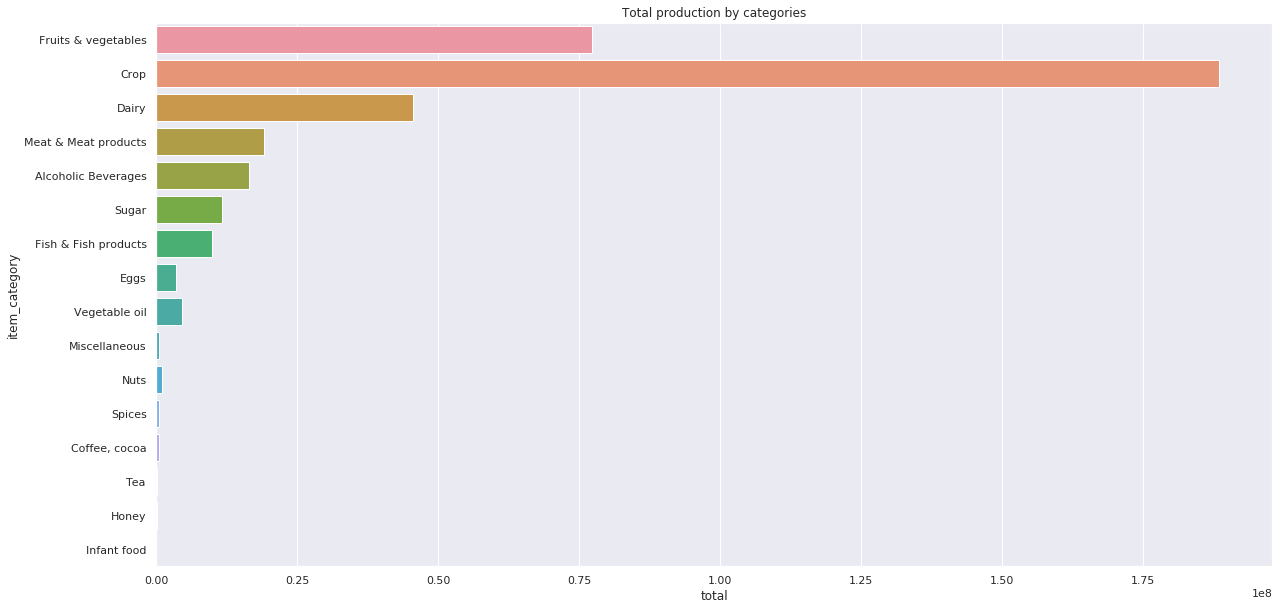

In [92]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(x='total', y='item_category', data=new_df_with_cat, ci=None, estimator=sum)
plt.title('Total production by categories')

# Top categories in Food / Feed - Catplot

In [93]:
# Top 3 categories in Food
food_biggest_categories = (new_df_with_cat[new_df_with_cat.element == 'Food']
                           .groupby('item_category').sum()).sort_values(by='total', ascending=False)[:3]
food_biggest_categories

,total
item_category,
Crop,112460355.0
Fruits & vegetables,75173489.0
Dairy,38629538.0


In [94]:
# Top 3 categories in Feed
feed_biggest_categories = (new_df_with_cat[new_df_with_cat.element == 'Feed']
                           .groupby('item_category').sum()).sort_values(by='total', ascending=False)[:3]
feed_biggest_categories

,total
item_category,
Crop,75973408.0
Dairy,6803194.0
Fish & Fish products,2200705.0


In [95]:
data_for_catplot = (new_df_with_cat[new_df_with_cat
                                    .item_category
                                    .isin(['Crop', 'Dairy', 'Fruits & vegetables', 'Fish & Fish products'])])
data_for_catplot.head(3)

,area,element,item_category,item,total
0,"China, mainland",Food,Fruits & vegetables,Vegetables,9046594.0
1,"China, mainland",Food,Crop,Cereals - Excluding Beer,8678866.0
2,"China, mainland",Food,Fruits & vegetables,"Vegetables, Other",7962498.0


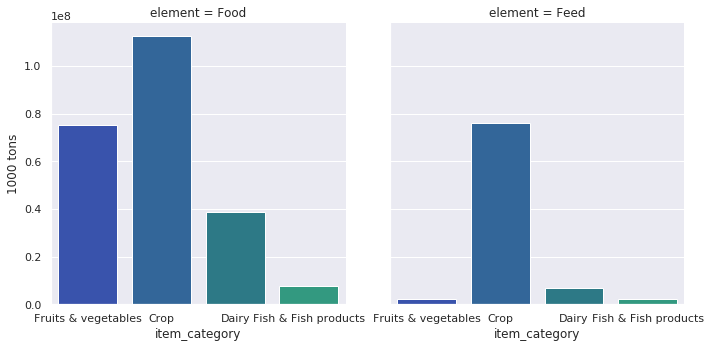

In [96]:
g = sns.catplot(x="item_category", y="total", col="element", ci=None,
                data=data_for_catplot, saturation=.5,
                kind="bar", estimator=sum, palette= 'winter')
g.set_ylabels('1000 tons')

# Top categories vs Top Countries in Food / Feed - Catplot

In [97]:
data_for_catplot_countries = (new_df_with_cat.loc[
    (new_df_with_cat.area.isin(['China, mainland','United States of America', 'India'])) &
    (new_df_with_cat.item_category.isin(['Crop', 'Dairy', 'Fruits & vegetables', 'Fish & Fish products']))])

In [98]:
data_for_catplot_countries.groupby(['area', 'element', 'item_category']).sum()

total
area                     element item_category                   
China, mainland          Feed    Crop                  14246580.0
                                 Dairy                    75842.0
                                 Fish & Fish products    323015.0
                                 Fruits & vegetables     879484.0
                         Food    Crop                  27568581.0
                                 Dairy                  1176438.0
                                 Fish & Fish products   2226835.0
                                 Fruits & vegetables   21558036.0
India                    Feed    Crop                   1047183.0
                                 Dairy                   867396.0
                                 Fish & Fish products     23885.0
                         Food    Crop                  17818075.0
                                 Dairy                  4957415.0
                                 Fish & Fish products    353385.0
                                 Fruits & vegetables    8020855.0
United States of America Feed    Crop                  15091483.0
                                 Dairy                    83208.0
                                 Fish & Fish products    132109.0
                                 Fruits & vegetables      14942.0
                         Food    Crop                   4399425.0
                                 Dairy                  6736666.0
                                 Fish & Fish products    510082.0
                                 Fruits & vegetables    5805380.0

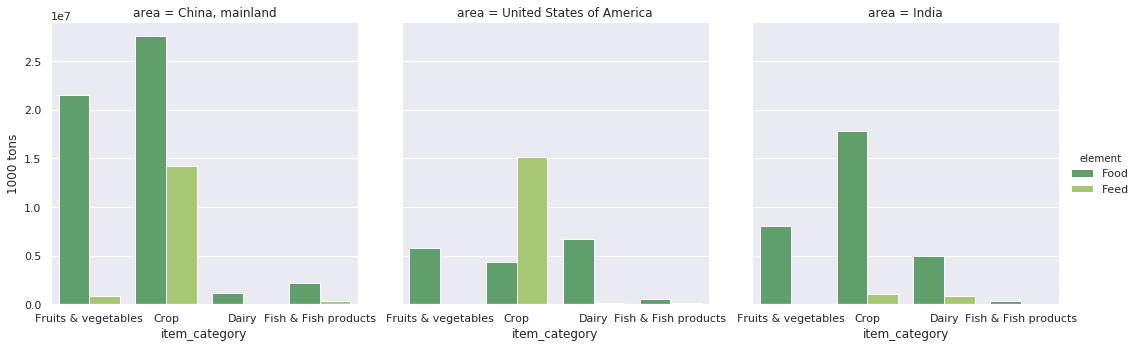

In [99]:
g = sns.catplot(x='item_category', y='total', col='area', hue='element', kind='bar', estimator=sum, ci=None,
                data=data_for_catplot_countries, palette = 'summer')
g.set_ylabels('1000 tons')